# Star Wars movies - Analysis of the survey run by FiveThirtyEight

`category: data cleaning and exploratory data analysis`

In 2014, authors at [FiveThirtyEight](https://fivethirtyeight.com/), a site which publishes articles based on statistics and data analysis, decided to run a survey in order to understand which Star Wars movies were the most successful and how characters were perceived by the audience. They used [SurveyMonkey](https://www.surveymonkey.com/market-research/solutions/audience-panel/) to reach the respondents.<br /> 

The author of the [article](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/) where the results were presented, actually said that one of the reasons to run the survey was "*Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?* ".<br />
If you are a sci-fi lover, you've certainly heard more than once that the original trilogy is much better than the 2000's movies. *Is this the everyone's opinion in the poll? Or are there people who also like the most recent works?*. But also, *what are the most and least favorite characters in the series?*<br /> 
In this project, we're going to explore the dataset resulting from the poll, which can be downloaded [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

At the time, only the first six movies of the series had been released (the sequel trilogy would have started in 2015 with "The Force Awakens"). In order to avoid confusion, we will refer to the movies considering the story chronology, not their release year. In other words:

      Episode I:  The Phantom Menace (1999)
      Episode II:  Attack of the Clones (2002)
      Episode III:  Revenge of the Sith (2005)
      Episode IV:  A New Hope (1977)
      Episode V: The Empire Strikes Back (1980)
      Episode VI: Return of the Jedi (1983)

We will also refer to **episodes IV to VI** as the **original series**, and also shorten the titles for readability (e.g. **The Empire** for episode V).<br /><br />

### **Preview of the results:**

   * **The Empire Strickes back** is actually the most seen and the most appreciated of the series, on average;
   * The original series is generally seen more favorably by the respondents;
   * **The Phantom Menace** is however generally appreciated, especially by respondents who don't consider themselves fans of the Star Wars franchise and by older people;
   * **Luke Skywalker** is the most appreciated character.<br /><br />
   
<u>Techniques practised in the project</u>: 
* data cleaning (dealing with missing/inconsistent records) 
* data visualization (matplotlib, seaborn)
* data analysis (grouping operations)   
   
   
   

## Loading and getting acquainted with the data

In [1]:
# importing the necessary python libraries
import numpy as np
import pandas as pd

We'll read the data directly from the Github repository page, because its first row contain useful information which will be used to rename the columns of the characters (more on this in the cleaning section).

In [2]:
data_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv'
star_wars = pd.read_csv(data_url, encoding='ISO-8859-1')
# star_wars = pd.read_csv('datasets/star_wars.csv', encoding='ISO-8859-1') # use this line to read the data locally, instead

Next, we'll save the first row in a `useful_info` dataframe and drop it from the `star_wars` dataframe:

In [3]:
useful_info = star_wars.iloc[0, :].to_frame() 
star_wars.drop(0, axis=0, inplace=True)

In [4]:
# preview of the dataset
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


In [5]:
star_wars.shape

(1186, 38)

We see that the dataframe is 1186 rows by 38 columns.

The firt column, `RespondentID`, is a unique identifier for the person who took the survey.<br />
The following two columns:
* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

contain Yes/No and will be appropriately converted to True/False (boolean).

The six columns from `Which of the following Star Wars films have you seen? Please select all that apply.` to `Unnamed: 8` contain the Star Wars movies titles from I to VI respectively. If a respodent has seen a certain movie, its title will show up in the corresponding column, otherwise it will be Nan (as an example, the first respondent has seen all of them, the second none of them, the third only the movies from I to III).

The six columns from `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` to `Unnamed: 14` contain the ranking of the movies, from episode I to episode VI. As an example, let's consider the first respondent:

In [6]:
star_wars.iloc[0, 9:15].to_frame().T

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6


Each respondent rated 1 hi favorite movie, 2 his second favorite and so on until his/her least favorite. In this case, the respondent's favorite episode was the III (corresponding to `Unnamed 11`), his least favorite was the VI (corresponding to `Unnamed 14`).

In the following **Cleansing section** we will do the necessary cleaning operations and perform consistency checks which will highlight some less obvious problems. 

## Cleansing section

###      - *renaming columns, casting values*

Let's take a look at the two columns with Yes/No values.

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We now convert their values to True/False, using a dictionary.

In [9]:
# dictionary for conversion
yes_no_toBool = {'Yes': True,
                 'No': False}

# apply the dictionary to the columns using the map function

# first column
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = \
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no_toBool)

# second column
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = \
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no_toBool)

We now rename the columns which indicate which movies the respondents have seen and convert their values to boolean.<br />
(**note**: Nan values are converted to False, i.e. we're interpreting Nans as 'I didn't see this movie'.)

In [10]:
# dictionary for renaming column names
seen_movies = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                 'Unnamed: 4': 'seen_2',
                 'Unnamed: 5': 'seen_3',
                 'Unnamed: 6': 'seen_4',
                 'Unnamed: 7': 'seen_5',
                 'Unnamed: 8': 'seen_6'}

# renaming columns
star_wars.rename(seen_movies, axis=1, inplace=True)

# dictionary for converting values to boolean
movies_to_bool = {'Star Wars: Episode I  The Phantom Menace': True,
                  'Star Wars: Episode II  Attack of the Clones': True,
                  'Star Wars: Episode III  Revenge of the Sith': True,
                  'Star Wars: Episode IV  A New Hope': True,
                  'Star Wars: Episode V The Empire Strikes Back': True,
                  'Star Wars: Episode VI Return of the Jedi': True,
                   np.nan: False}

# converting values to boolean using map
seen_cols = [f'seen_{i}' for i in range(1, 7)]   
for col in seen_cols:
    star_wars[col] = star_wars[col].map(movies_to_bool)

In [11]:
########################################
### alternative to the previous cell ###
########################################

# instead of a dictionary applied to each of the seen_ columns, 
# we can use a function applied elementwise to the corresponding dataframe

# def func_movies_to_bool(title):
#     if pd.isnull(title):
#         return False
#     return True

# star_wars[seen_cols] = star_wars[seen_cols].applymap(func_movies_to_bool)

Similarly, we change the names of the **ranking columns** for more readibility. We also need to convert to numeric type from string type:

In [12]:
# building the two lists with new and old column names
new_names = ['ranking_{}'.format(i) for i in range(1, 7)]
old_names = star_wars.columns[9:15].values

# renaming the columns zipping together the two lists into a dictionary
star_wars.rename(dict(zip(old_names, new_names)), axis=1, inplace=True)

# convert these columns to float
for rank_col in new_names:
    star_wars[rank_col] = pd.to_numeric(star_wars[rank_col])

After these cleaning operations, the first columns of the dataframe look like this:

In [13]:
star_wars.iloc[:, 0:15].head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0


Finally, we'll rename the columns following the rankings, which are referred to a series of characters of the movies, each.
For this task, we'll use the info contained in the `useful_info` dataframe (i.e. the isolated first row of the dataset).

In [14]:
useful_info.iloc[15:29].T

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


In [15]:
# renaming the columns referred to different movies characters
star_wars.rename(useful_info.iloc[15:29].to_dict()[0], axis=1, inplace=True)

### - *filtering out the data we don't need*

Of course, we're interested in the answers of those who have seen at least one movie of the franchise.<br />
Let's select only those rows:

In [16]:
star_wars = star_wars[star_wars['Have you seen any of the 6 films in the Star Wars franchise?']].reset_index(drop=True)

star_wars.shape

(936, 38)

We have shrinked the dataframe from 1186 to **936** records.

### - *consistency check*

Some respondents have not checked any of the movie of the franchise as "seen", although they stated they saw at least one.<br /> 
As an example, consider the following respondents:

In [17]:
star_wars.iloc[[303, 309, 310], :15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
303,3.290701e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
309,3.290695e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
310,3.290693e+09,True,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


We'll filter out those rows because they don't contain any opinion about the movies, remaining with **835** records:

In [18]:
# select only those rows for which at least one of the "seen" cols is True
star_wars = star_wars[star_wars[seen_cols].any(axis=1)].reset_index(drop=True)

star_wars.shape

(835, 38)

We can quickly have an idea of the **missing values left in the `seen_` and `ranking_` columns** by using the heatmap from seaborn, which translates numeric values to colors.<br /> 
In the case of the next cell, a null value is a True, which is treated as 1 (light color), a non-null value is a False, which is treated as 0 (dark color).

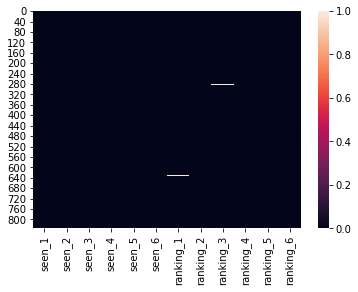

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# columns we're interested in
seen_cols = ['seen_{}'.format(i) for i in range(1,7)]
ranking_cols = ['ranking_{}'.format(i) for i in range(1,7)]

# build the heatmap explained above
sns.heatmap(star_wars[seen_cols + ranking_cols].isnull())

# plt.xticks(rotation=50)
plt.show()

We see that, apart from very few values in `ranking_1` and `ranking_3`, no missing values are present. Let's see those few cases more closely: 

In [20]:
# how many null values in the ranking columns?
star_wars[ranking_cols].isnull().sum()

ranking_1    1
ranking_2    0
ranking_3    1
ranking_4    0
ranking_5    0
ranking_6    0
dtype: int64

Only two rows have missing ranking:

In [21]:
star_wars[star_wars[ranking_cols].isnull().any(axis=1)].iloc[:, :15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
284,3.290688e+09,True,True,True,True,True,True,True,True,1.0,2.0,NaN,4.0,5.0,3.0
633,3.289450e+09,True,False,False,False,False,False,True,False,NaN,3.0,2.0,5.0,1.0,4.0


The missing ranking of the first row can be easily imputed because the respondent has seen all of the movies and ranked all of them except the third.

In [22]:
star_wars.loc[284, 'ranking_3'] = 6

The second row is not so trivial to fix because the values seem inconsistent: the respondent stated he saw only the V movie, but he ranked all of them except the first.

Indeed, **this observation is part of a larger data consistency problem**. In fact, a person should have only ranked those movies he/she has seen! Unfortunately, as we also understand from the heatmap seen before, rankings are practically always included, even for unseen movies.<br /> 
Let's take some rows to get familiar with the problem.

In [23]:
# examples of inconsistent seen-movie/ranking
star_wars.iloc[[342, 501, 512, 730], :15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
342,3.290506e+09,True,False,True,False,False,False,True,True,6.0,1.0,2.0,3.0,4.0,5.0
501,3.289908e+09,True,False,True,False,False,False,True,True,1.0,4.0,5.0,6.0,3.0,2.0
512,3.289886e+09,True,False,True,True,False,False,True,True,3.0,4.0,5.0,6.0,1.0,2.0
730,3.288626e+09,True,True,True,False,False,False,True,True,3.0,4.0,5.0,6.0,1.0,2.0


This problem is something we have to try and fix, because it would influence the mean ranking we will calculate in our analysis.<br />
To start fixing the inconsistency, we will **substitute the inconsistent rankings with Nans**.

In [24]:
# function which will perform the substitution task
def inconsistent_ranks_to_nan(row, i):
    if not row['seen_{}'.format(i)]:
        return np.nan
    return row['ranking_{}'.format(i)]

# apply the function along the rows (axis=1), modifying each ranking column
for col in range(1, 7):
    star_wars[f'ranking_{col}'] = star_wars.apply(inconsistent_ranks_to_nan, args=[col], axis=1)

In [25]:
#########################################################
# the previous logic can also be implemented like this: #
#########################################################

# def inconsistent_ranks_to_nan(seen, rank):
#     if not seen:
#         return np.nan
#     return rank

# for col in range(1, 7):
#     star_wars[f'ranking_{col}'] = \
#         star_wars.apply(lambda row: inconsistent_ranks_to_nan(row[f'seen_{col}'], row[f'ranking_{col}']), axis=1)

If we now again look at some of the rows, we see the effect of the fixing:

In [26]:
star_wars.iloc[[237, 342, 501, 512, 730], :15]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
237,3.290779e+09,True,False,True,False,True,False,True,True,2.0,NaN,4.0,NaN,6.0,1.0
342,3.290506e+09,True,False,True,False,False,False,True,True,6.0,NaN,NaN,NaN,4.0,5.0
501,3.289908e+09,True,False,True,False,False,False,True,True,1.0,NaN,NaN,NaN,3.0,2.0
512,3.289886e+09,True,False,True,True,False,False,True,True,3.0,4.0,NaN,NaN,1.0,2.0
730,3.288626e+09,True,True,True,False,False,False,True,True,3.0,NaN,NaN,NaN,1.0,2.0


Although we solved the problem of ranked unseen movies, by looking at the first two rows in the previous cell, we spot **another inconsistency**: in the first, ranks 4 and 6 should be 3 and 4; in the second, 4, 5 and 6 should be 1, 2 and 3. We therefore need to **standardize the rankings of each row**, bringing them back to the values 1,2,3,4...<br />
We'll do this in the next cell.

In [27]:
def func(ranking_series):
    # The input to this function are the rankings for one row. 
    # Ex: 2.0, NaN, 4.0, NaN, 6.0, 1.0
    
    # reset the index to 0,1,2,3,4,5,6 instead of ranking_1,ranking_2,...
    ranking_series_int_index = pd.Series(ranking_series.values)
    
    # sort the values so to separate non-null from null values, and
    # saving the indexes to a new variable
    indexes = ranking_series_int_index.sort_values().index
    
    # stop is the index at which non-null are separated from null values
    stop = pd.notnull(ranking_series_int_index).sum()
    
    # build two series, one with the progressive rankings, the other with null values
    non_null_values = pd.Series(np.arange(1, stop + 1), index=indexes[:stop])
    null_values = pd.Series([np.nan] * (6-stop), index=indexes[stop:], dtype=float)
    
    # concatenate the two series and going back to the old order of values
    ranking_series_fixed = pd.concat([non_null_values, null_values]).sort_index()
    
    return ranking_series_fixed

# apply the function on rows
star_wars[ranking_cols] = star_wars.apply(lambda row: func(row[ranking_cols]), axis=1)  

The set of columns `seen_` and `ranking_` is now fully consistent.

## Exploratory data analysis

## - Which movies were the most seen? Which are the favorite?

Let's first consider the whole cleaned dataset (835 people), and find out what are the most viewed and top rated movies of the franchise.<br />
We will plot a bar graph with the percentages of respondents who saw each movie of the franchise and another bar graph with the average ranking of each movie (**for the ranking, recall that 1 means most favorite and 6 means least favorite**).

In [28]:
# movies titles from I to VI to use as labels
movies_titles = ("The Phantom Menace", 
                 "Attack of the Clones", 
                 "Revenge of the Sith",
                 "A New Hope",
                 "The Empire Strikes Back",
                 "Return of the Jedi")

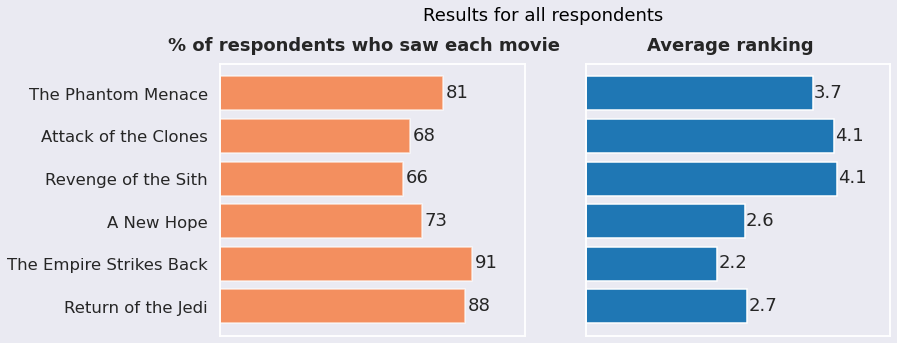

In [29]:
# preparing the data needed for the plot
seen_cols = [f'seen_{i}' for i in range(1, 7)]
most_viewed = star_wars[seen_cols].mean()
mean_ranking = star_wars[ranking_cols].mean()

# setting style and context through seaborn
sns.set_style('dark')
sns.set_context('talk')

# create a figure with two axes
fig, (axl, axr) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
fig.text(0.36, 1, 'Results for all respondents', color='black')

# generate the first horizontal bar plot
axl.barh(movies_titles[-1::-1], width=most_viewed[-1::-1], color="#F76921", alpha=0.7)
axl.set_xlim(0, 1.1)
axl.set_xticks([])
axl.text(-0.19, 6,'% of respondents who saw each movie', weight='bold') 
# drawing percentages on the chart as text
for i in range(6):    
    axl.text(most_viewed[i]+0.01, 5-i-0.1, int(round(most_viewed[i]*100)))


# 2nd plot with average rankings
axr.barh(movies_titles[-1::-1], width=mean_ranking[-1::-1])
axr.set_xlim(0, 5)
axr.set_xticks([])
axr.text(1, 6, 'Average ranking', weight='bold')
for i in range(6):    
    axr.text(mean_ranking[i]+0.02, 5-i-0.1, round(mean_ranking[i], 1))
    
fig.set_facecolor(axr.get_facecolor())    
    
plt.show()

More than 90% of the respondent saw **The Empire Strikes Back**, followed closely by the **Return of the Jedi**.<br /> 
**The Phantom Menace** is the third most viewed movie with 81% of respondents.

Looking at the rightmost plot, we see that the last three movies are the top rated, with **The Empire Strikes Back** as the most favorite.

<u>*We can already say that **The Empire** was the most seen and the most appreciated, on average, of the franchise*</u>, considering all the respondents.

## - Do the results change if we consider fans and occasional viewers separately?

It's interesting to repeat the same analysis by grouping the respondents according to their affection towards the Star Wars franchise, to see if there is any difference. We will use the column `Do you consider yourself to be a fan of the Star Wars film franchise?` and distinguish between fans and non-fans.

In [30]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
False    283
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The number of non-fans is about half of the number of fans; nonetheless, there are enough of both.<br />
We will create a chart in the next cell.

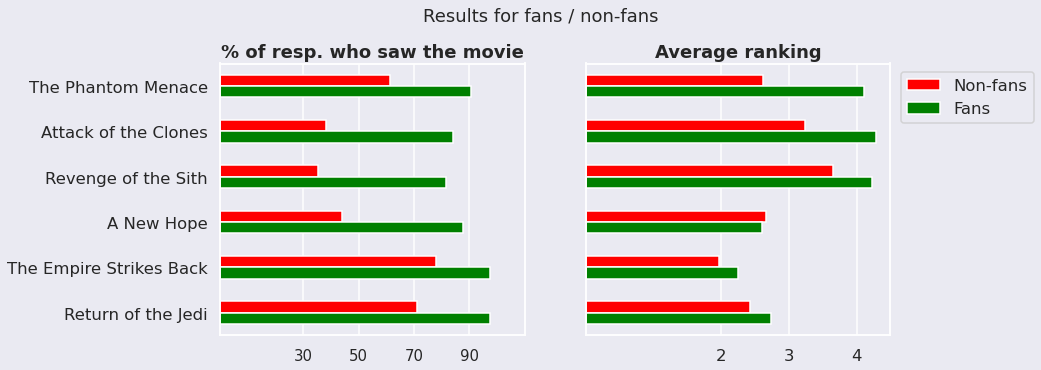

In [31]:
# alias for the column name
are_you_fan = 'Do you consider yourself to be a fan of the Star Wars film franchise?'

# create figure and axes objects
fig, (axl, axr) = plt.subplots(1, 2, figsize=(12, 5))
fig.text(0.36, 1, 'Results for fans / non-fans')

### leftmost chart ###
# processing data for the chart
seen_pct = star_wars.groupby(are_you_fan)[seen_cols].apply(np.mean).T
# plot chart and customize it
seen_pct.plot.barh(ax=axl, legend=False, sharey=True, color=['r','g'])
axl.set_yticklabels(movies_titles)
axl.set_xticks([.3, .5, .7, .9])
axl.set_xticklabels([30, 50, 70, 90], fontsize='small')
axl.set_xlim(0, 1.1)
axl.invert_yaxis()
axl.set_title('% of resp. who saw the movie', weight='bold')
axl.grid(axis='x')

### rightmost chart ###
# processing data for the chart
avg_ranks = star_wars.groupby(are_you_fan)[ranking_cols].apply(np.mean).T
# plot chart and customize it
avg_ranks.plot.barh(ax=axr, color=['r','g'])
axr.set_xticks([2,3,4])
axr.legend(['Non-fans', 'Fans'], bbox_to_anchor=(1.5,1))
axr.invert_yaxis()
axr.set_title('Average ranking', weight='bold')
axr.grid(axis='x')

fig.set_facecolor(axr.get_facecolor())

plt.show()

We see that the chance for a respondent to have seen a movie of the series is always higher for fans, as could be expected.<br />
The most seen movies for both categories are **The Empire** and **Return of the Jedi**, while the third most seen is **A new hope** for fans and **The phantom menace** for non fans.

Both categories have **consistently ranked the original series (episodes IV to VI) as the best movies**, with **The Empire** as their favorite on average.
The rating of episodes I to III is on average very low for the fans tribe, while non-fans also like **The phantom menace**, with a rating close to the original series.

<u>*The average rankings highlight that the original series is generally much more appreciated both by fans and occasional viewers. The Phantom Menace is also appreciated by occasional viewers.*</u>

## - **Favorite movies by age group**

The dataset also contains demographic info like gender, age, houseold income.<br />
Let's consider age groups:

In [32]:
star_wars['Age'].value_counts().sort_index()

18-29    180
30-44    207
45-60    240
> 60     192
Name: Age, dtype: int64

We want to find the **first two favorite movies** of each age group, considering the mean ranking.

In [33]:
# grouping by age group and calculate the mean ranking of each movie
df = star_wars.groupby('Age')[[f'ranking_{i}' for i in range(1, 7)]].apply(np.mean)
# printing the results for each group in ascending ranking order
print("Average rankings for different age groups:\n\n")
for ind in df.index:
    print(df.loc[ind].sort_values().round(1).to_frame().T)
    print()

Average rankings for different age groups:


       ranking_5  ranking_4  ranking_6  ranking_3  ranking_2  ranking_1
18-29        2.5        2.7        2.8        3.8        4.1        4.1

       ranking_5  ranking_4  ranking_6  ranking_3  ranking_2  ranking_1
30-44        2.0        2.5        2.5        4.3        4.3        4.4

       ranking_5  ranking_4  ranking_6  ranking_1  ranking_2  ranking_3
45-60        2.1        2.5        2.6        3.5        4.2        4.3

      ranking_5  ranking_1  ranking_6  ranking_4  ranking_2  ranking_3
> 60        2.2        2.7        2.7        2.9        3.6        4.1



The results are quite consistent across the groups, except for a little surprise for respondents older than 60:

* For respondents younger than 60 years, **The Empire (ep. V)** and **A New Hope (ep. IV)** are the first two favorite movies;
* For respondents older than 60 years, **The Empire** is still the top rated movie, but on second rank we find **The phantom menace (ep. I)** and **Return of the Jedi (ep. VI)** equally ranked. 

Considering also the results of the previous paragraph, <u>The Phantom Menace could be worth further investigation</u> (why some people found it as good as the movies from the original series?).

## - How are the different characters perceived?

The authors at Five Thirthy Eight also considered 13 movies characters, for each of whom the respondent was asked to: 

***Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her***

Actually, the answers were more nuanced, as we can see from the column of Han Solo:

In [34]:
star_wars.iloc[:, 15].value_counts(dropna=False)

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                14
Somewhat unfavorably                             8
NaN                                              7
Very unfavorably                                 1
Name: Han Solo, dtype: int64

In order to make the results more easily understandable, we map the values according to the dictionary in the following cell:

In [35]:
favorability = {'Very favorably': 'favorably', 
                'Somewhat favorably': 'favorably',
                'Neither favorably nor unfavorably (neutral)': "I'm neutral", 
                'Unfamiliar (N/A)': "I'm unfamiliar",
                'Somewhat unfavorably': 'unfavorably', 
                'Very unfavorably': 'unfavorably',
                 np.nan: np.nan}

star_wars.iloc[:, 15:29] = star_wars.iloc[:, 15:29].applymap(lambda x: favorability[x])

We will represent the results in four bar charts.

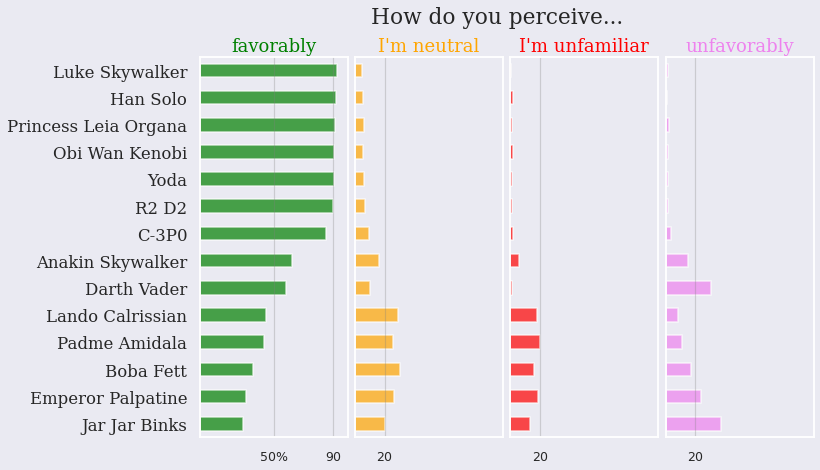

In [36]:
# processing the data needed for the plot:

# getting favorability rates for each character. 
favorability_list = [star_wars.iloc[:, i].value_counts(normalize=True) for i in range(15, 29)]  
favorability_df = pd.concat(favorability_list, axis=1).T  # building a dataframe with the data
# put favorably seen characters on top
favorability_df.sort_values('favorably', inplace=True)

##############
### FIGURE ###
##############

fig, axs = plt.subplots(1, ncols=4, figsize=(11,7), sharey=True)

colors = ['green', 'orange', 'red', 'violet']

for i in range(4):
    favorability_df.iloc[:, i].plot(kind='barh', ax=axs[i], color=colors[i], alpha=0.7)
    axs[i].set_xlim(0,1)
    axs[i].set_title(favorability_df.columns[i], c=colors[i], fontfamily='serif')

# customizing x-y axis ticks and drawing vertical lines   
axs[0].set_xticks([.5, .9])
axs[0].set_xticklabels(['50%', '90'], fontsize='x-small')
for tick in axs[0].get_yticklabels():
    tick.set_fontname('serif') # change font for y tick labels
for i in range(1, 4):
    axs[i].set_xticks([.2])
    axs[i].set_xticklabels(['20'], fontsize='x-small')
    
# drawing vertical lines to improve readability    
axs[0].axvline(.5, alpha=0.3, c='grey', linewidth=1.2)
axs[0].axvline(.9, alpha=0.3, c='grey', linewidth=1.2)
for i in range(1, 4):
    axs[i].axvline(.2, alpha=0.3, c='grey', linewidth=1.2)

# adjust space among subplots (wspace is in units of plot width)    
fig.subplots_adjust(wspace=0.05)    
# change figure bg to match the axes bg
fig.set_facecolor(axs[0].get_facecolor())

fig.suptitle('How do you perceive...', fontfamily='serif')

# these lines can be used to remove the white spines around the subplots
# for i in range(4):
#     for location in ['left', 'right', 'bottom', 'top']:
#         axs[i].spines[location].set_visible(False)

plt.show()

We see that **Luke Skywalker**, **Han Solo**, **Princess Leia Organa**, **Obi Wan Kenobi**, **Yoda**, **R2 D2** and **C-3P0** are all viewed favorably by the great majority of respondents.<br />
Poor **Jar Jar Binks** is the least succesfull character of the series. This completely computer-generated character was highly criticized since its first appearance in **The phantom menace**, and is consistently ranked among the worst characters ever invented, like in [this article](https://abcnews.go.com/Entertainment/Movies/top-10-worst-tv-film-characters-time/story?id=10809609).

## Conclusions

In this project we have analysed a dataset containing the results of a survey regarding the Star Wars movies released before 2014, i.e. episoded I-VI.<br />
The results generally confirm that the original trilogy is preferred over the prequel trilogy. In particular:
* **The Empire Strikes Back** is the most seen (more than 90% of the respondents) and highest ranked (2.2 on average) of the movies. This is still true if we distinguish fans and non-fans. **The Phantom Menace** is the third most seen movie (81%) after **Return of the Jedi**.
* Fans consistently rate the original series much more favorably than the prequel. Non-fans also appreciate the original movies.
* Non-fans consider on average **The Phantom Menace** as good as **A New Hope**.
* Respondents older than 60 consider **The Phantom Menace** as good as **Return of the Jedi**, although **The Empire** is the favorite across each age group.
* **Luke Skywalker**, **Han Solo**, **Princess Leia Organa**, **Obi Wan Kenobi**, **Yoda** and **R2 D2** are all favorably viewed by most respondents (around 90%).
* **Jar Jar Binks** is seen unfavorably by 37% of the respondents, and is confirmed as the least appreciated character of the series.

It would also be interesting to gather more data on The Phantom Menace to understand why some people see it so positively while others don't.